<a href="https://colab.research.google.com/github/jmdelvecchio/ears33/blob/main/Rock_strength_and_relief_in_NE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome

For my term project, I studied [this paper](https://reader.elsevier.com/reader/sd/pii/0191814191901356?token=AD556EFC4369C25FA6C81F669DE43FC0ECD942FBC60A82C1BD7121753DBC9DBA35E70D5B1BD095E614B8E32891C072DD&originRegion=us-east-1&originCreation=20220410203404) about bedrock joints and their relation to dikes and veins in Mt. Ascutney, Vermont. It was hard to develop a question to ask about the topic that could be answered or at least explored in a data tutorial, but I was able to figure something out by focusing on one part of the paper I read. 

The paper argues that the atypical distribution of joint directions in Mt. Ascutney can be explained by its isolation from the prevailing neotectonic stress field of New England. The mountain is so prominent that it doesn't feel the squeeze. Mt. Ascutney is an igneous intrusion from the Cretaceous surrounded by softer rock that was worn away in glaciations. The glaciers increased Mt. Ascutney's prominence by lowering the surrounding terrain.

In this data tutorial you will analyze data to relate bedrock geology to relief. The work to get relief data has already been done for you. The relief at a point P was defined as the range in elevation in a 1000m radius disc around point P.

# Data explanation

The DEM that the relief data was calculated on was a [90m DEM taken from OpenTopography](https://portal.opentopography.org/raster?opentopoID=OTSRTM.042013.4326.1&minX=-73.52600097656251&minY=42.638757578558426&maxX=-70.93322753906251&maxY=45.147905553877536) of a quadrangle roughly encompassing New Hampshire and Vermont.

[State geologic maps for NH and VT](https://mrdata.usgs.gov/geology/state/) were taken from the USGS. These maps contained polygons corresponding to individual bedrock formations with geologic symbol. However, I grouped them according to the GENERALIZATION field, which only specified the general rock type.

Below are maps of the geology data and relief data


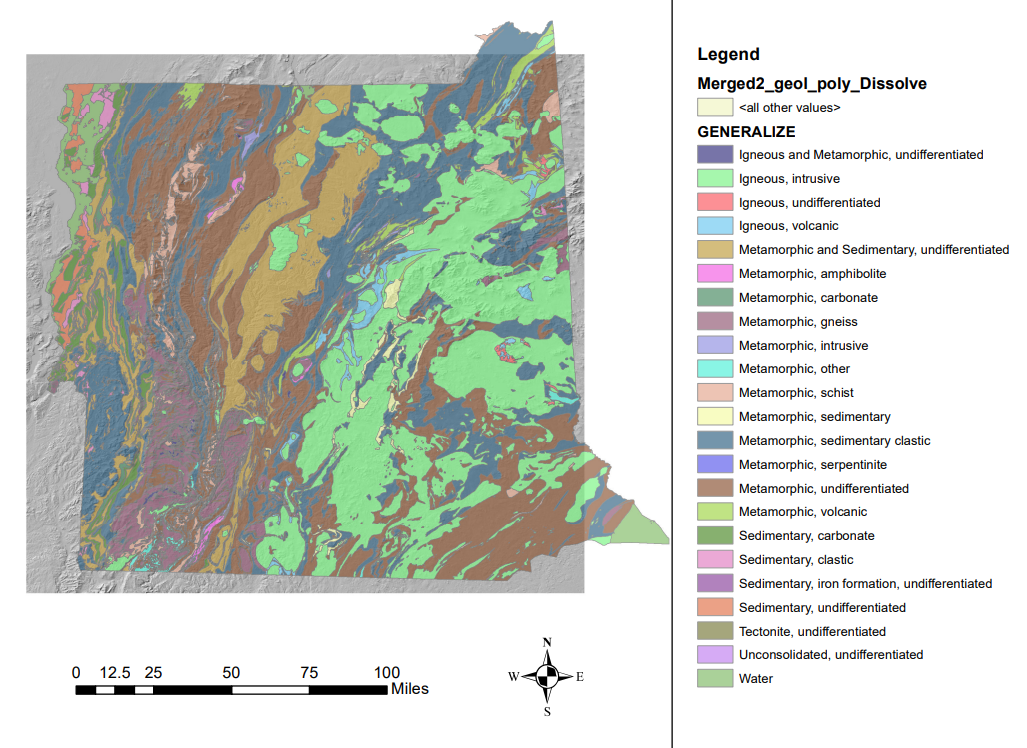

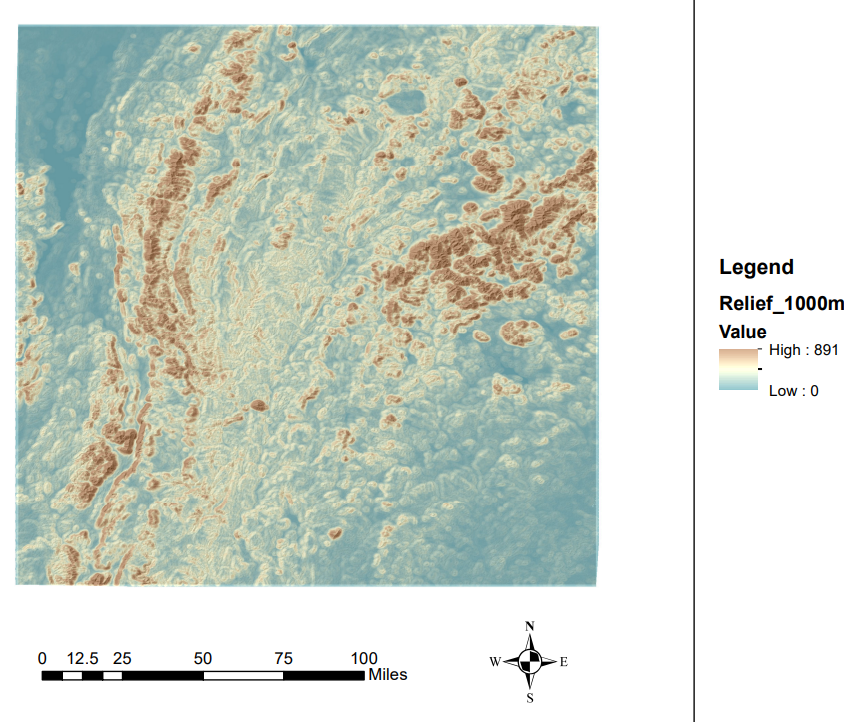

First, we will import all libraries we need.

In [ ]:

!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 4.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, we will load the data in. Make sure you have uploaded the file "ZonalRelief2.xls" on using the buttons to the left after starting the runtime.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EARS33_SP22_student_projects/yindavid_126463_9653135_ZonalRelief2.xls")
df.head()

,OBJECTID,GENERALIZE,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM,VARIETY,MAJORITY,MINORITY,MEDIAN
0,1,"Igneous and Metamorphic, undifferentiated",1,16166,1.072510e+08,52,613,561,204.203947,83.453848,3301161,476,143,54,185
1,2,"Igneous, intrusive",2,1860289,1.234182e+10,0,891,891,173.433013,118.702445,322635527,845,87,763,138
2,3,"Igneous, undifferentiated",3,10509,6.972046e+07,42,511,469,258.019888,107.624009,2711531,453,249,476,266
3,4,"Igneous, volcanic",4,86153,5.715698e+08,31,703,672,213.588813,101.724768,18401317,632,177,31,192
4,5,"Metamorphic and Sedimentary, undifferentiated",5,778709,5.166234e+09,10,832,822,158.194376,77.897499,123187384,765,160,633,148


If the data has been loaded in successfully, you should be able to see the first few lines of the data in a table above!

Next, let's plot the maximum relief by rock type, to see what the variation looks like.

Text(0.5, 0, 'Relief (m)')

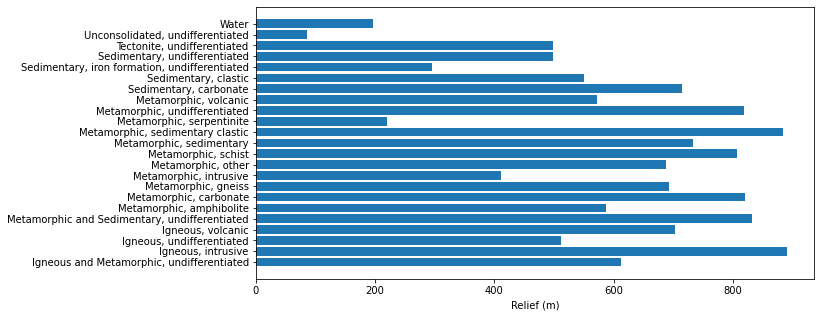

In [ ]:

fig, ax = plt.subplots(figsize =(10,5))
plt.barh(df.GENERALIZE, df.MAX)
ax.set_xlabel("Relief (m)")

Hopefully you should see that this is not the best way to present this data. One reason it's not is because you don't see any of the range of values for relief in areas with these types of underlying bedrock. For example, we see that sedimentary carbonate rock has a high maximum relief. Perhaps this is because of highly advective karst terrain being carved and getting high relief, OR it could be because there is a small zone of carbonate rock at the bottom of a big cliff at one isolated location somewhere in Vermont or New Hampshire. We will eventually plot the means of the relief with the standard deviation and range, which should clear up this uncertainty.

First, let's figure out what proportion of the terrain we're studying falls into one category. In the bar graph, the rock types are all presented as equals, but by looking at the geologic map above, it can clearly be seen that some rock types are more widespread than others. For example, most of New Hampshire is igneous intrusive rock.

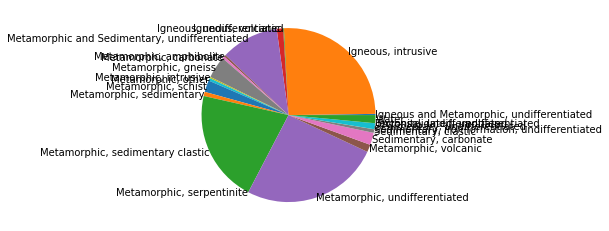

In [ ]:
plt.pie(df.AREA, labels = df.GENERALIZE, labeldistance= 1);

It isn't the prettiest plot, but you can see which categories are commonly encountered and which are rarely encountered. Next we will do the mean and errorbar plots:

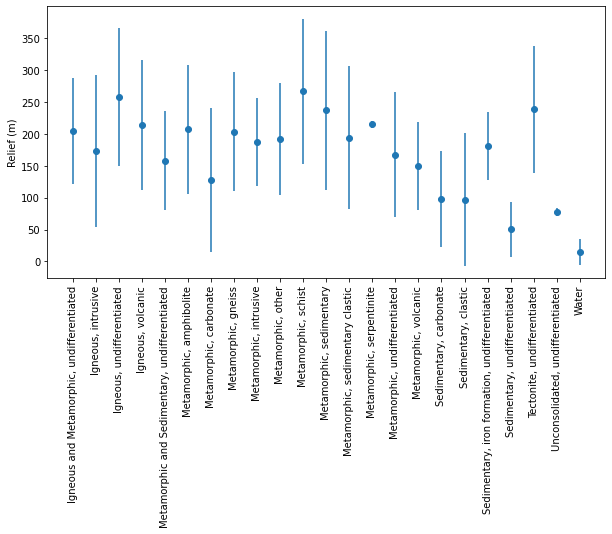

In [ ]:
fig, ax = plt.subplots(figsize =(10,5))

plt.errorbar(df.GENERALIZE, df.MEAN, df.STD, linestyle='None', marker='o');
plt.xticks(rotation = 90);
ax.set_ylabel("Relief (m)")
plt.show()

Unlike the first plot, this one reveals that sedimentary carbonate rock actually supports quite low relief, in general. What else can you learn from this plot about the relation between bedrock geology and topographic relief?

Your answer here:

It is hard to say. A weak relation between the hardness of the rock and relief could perhaps be deduced. For example, the sedimentary rocks generally have lower relief, as expected. However, looking at the map, we can see that sedimentary rocks are concentrated around the Lake Champlain coastline, which is a depositional area and would obviously lack large mountains. This data would perhaps be more effective if the rock strata that arose from erosion and uplift were random, but it seems that the mountains in Vermont have ground down to a certain layer and the rock types demonstrating high relief are just those that belong to the layer currently surfacing. If the rock types at the surface a long time ago or a long time in the future are different, perhaps we would still see mountains where they are, but they would be contributing to the relief for a different category of rock.

Reflection questions:

1. Is NH + VT an appropriate study area to study to deduce a relationship between bedrock geology and relief? What are the benefits and drawbacks of larger and smaller study areas?

2. Mt. Ascutney is an igneous intrusive formation. Looking at the last plot, does that fact explain anything about its prominence?

Your answer here:

1.
Making the study area larger would naturally control a lot of unique local factors affecting relief to get a more averaged view of how bedrock geology relates to topographic relief. However, making it larger would also expose the study area to more varied climactic, tectonic, or historical glacial conditions, which could bias the data.

New Hampshire and Vermont are mostly underlain by hard metamorphic and igneous rocks. Studying an area that also has sedimentary rocks, but not where active deposition is occuring, could show more variability in the relief vs bedrock geology plot.

2.
It seems that terrain underlain by igneous intrusive rocks have an intermediate level of relief compared to other rock types. Explaining why Ascutney sticks out above the surrounding Connecticut River glacial trough requires more than just noting its composition. Perhaps dynamic effects, like existing topography, also played a role in guiding glaciers around Ascutney.
